In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import datetime
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [10]:
spacy.util.fix_random_seed(0)
np.random.seed(0)
random.seed(0)

In [11]:
df = pd.read_csv("C:/Users/savil/Downloads/trump_insult_tweets_2014_to_2021.csv/trump_insult_tweets_2014_to_2021.csv")

In [12]:
df.head() # Already laughing

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [31]:
df.columns

Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet'], dtype='object')

In [13]:
df.shape # No way he actually insulted someone online 10360 times???

(10360, 5)

In [15]:
df.describe()

,Unnamed: 0
count,10360.000000
mean,5180.500000
std,2990.818728
min,1.000000
25%,2590.750000
50%,5180.500000
75%,7770.250000
max,10360.000000


In [17]:
df.isnull().sum()

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

In [32]:
df = (df.drop(df.columns[0], axis = 1,)).dropna()

In [33]:
df.isnull().sum()

date      0
target    0
insult    0
tweet     0
dtype: int64

In [34]:
df.dtypes

date      object
target    object
insult    object
tweet     object
dtype: object

In [35]:
df['target'].value_counts() # seems he hates the media the most

the-media               1287
democrats                647
hillary-clinton          625
trump-russia             441
joe-biden                402
                        ... 
chris-krebs                1
schiff-memo                1
abc-politics               1
tavis-smiley               1
intelligence-leakers       1
Name: target, Length: 866, dtype: int64

<AxesSubplot:>

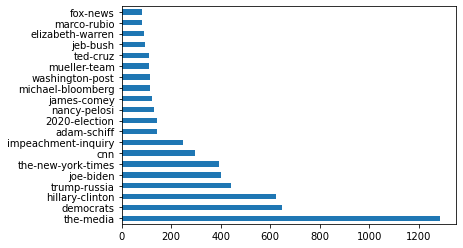

In [36]:
df['target'].value_counts().nlargest(20).plot(kind = 'barh')

<AxesSubplot:>

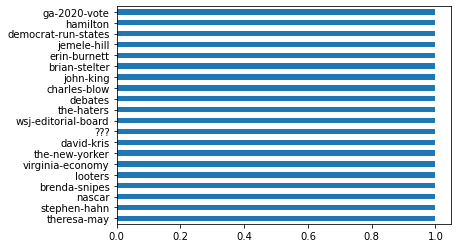

In [37]:
df['target'].value_counts().nsmallest(20).plot(kind = 'barh')

In [38]:
df['target'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10355    False
10356    False
10357    False
10358    False
10359    False
Name: target, Length: 10358, dtype: bool

In [39]:
df['insult'].value_counts()

Fake News               430
Crooked                 266
Sleepy Joe              129
failing                  82
Crooked Hillary          77
                       ... 
very bad at math          1
Andy Lack(y)              1
ridiculously high         1
waste Taxpayer Money      1
they're killing us        1
Name: insult, Length: 6728, dtype: int64

<AxesSubplot:>

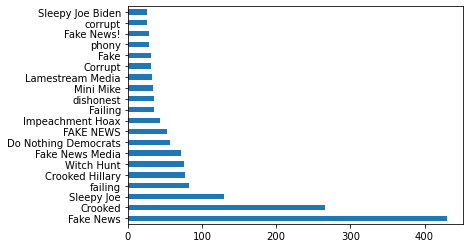

In [51]:
df['insult'].value_counts().nlargest(20).plot(kind = 'barh')

<AxesSubplot:>

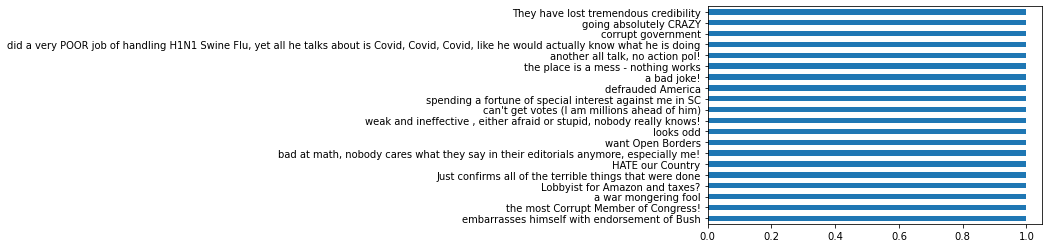

In [41]:
df['insult'].value_counts().nsmallest(20).plot(kind = 'barh')

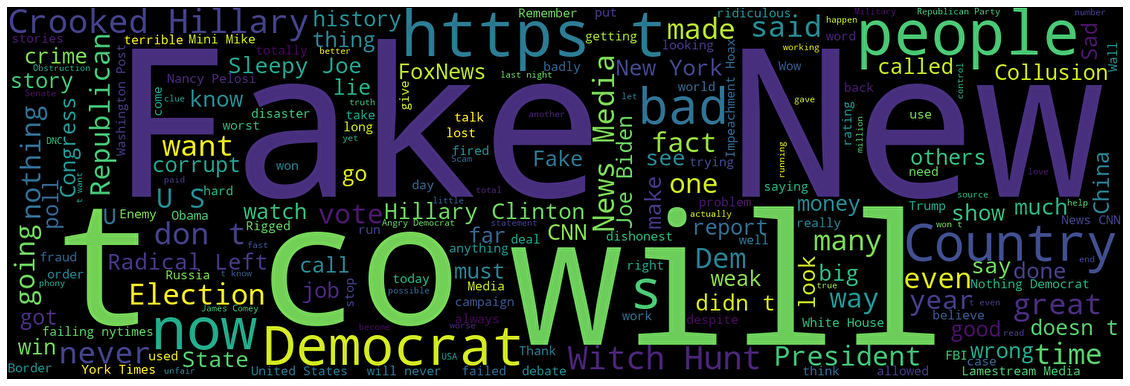

In [47]:
tweettxt = " ".join(df.tweet)

wordcloud = WordCloud(width = 1500, height = 500).generate(tweettxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show() # I used to think NLP was overrated, but this is actually pretty cool.

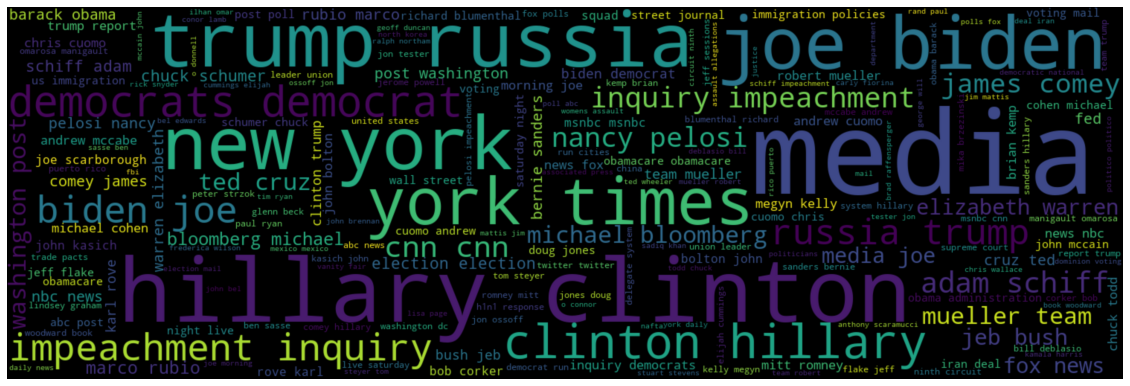

In [49]:
targettxt = " ".join(df.target)

wordcloud = WordCloud(width = 1500, height = 500).generate(targettxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'gaussian') 
plt.axis("off")
plt.show() 
# Interesting how these tweets span about 7 years and Biden became a big target despite only feuding a year or two ago
# He really hated Clinton... NYT too for that matter...

In [52]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
df.head()

datetime64[ns]


,date,target,insult,tweet
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


<AxesSubplot:>

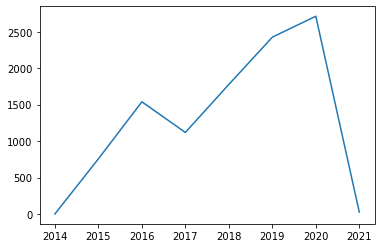

In [54]:
df['year'] = df['date'].dt.year
insults_over_years = df['year'].value_counts()
sns.lineplot(insults_over_years.index, insults_over_years.values)

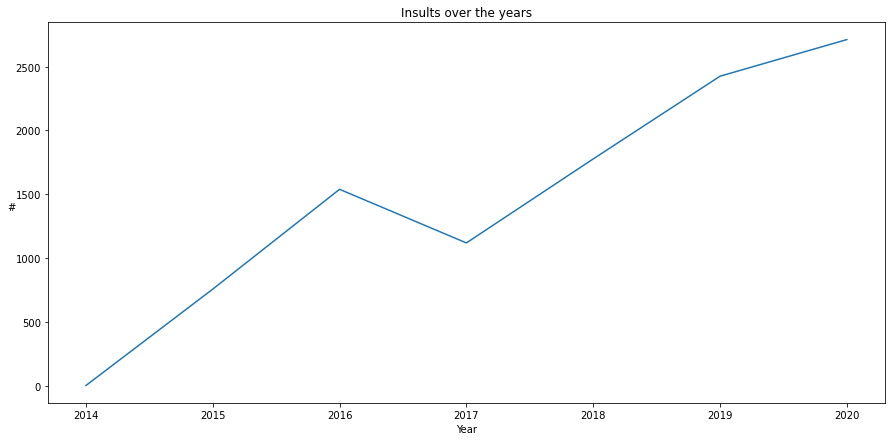

In [63]:
plt.figure(figsize = (15,7))
df['year'] = df['date'].dt.year
insults_over_years = df['year'].value_counts().drop(2021)
sns.lineplot(insults_over_years.index, insults_over_years.values)
plt.title("Insults over the years")
plt.xlabel("Year")
plt.ylabel("#", rotation = 0)
plt.show()
# As time went on, so did the anger

In [64]:
nlp = spacy.blank("en")

textcat = nlp.create_pipe(
"textcat",
config = {
    "exclusive_classes": True,
    "architecture": "bow"})
nlp.add_pipe(textcat)

In [65]:
labels = np.unique(df['year'].values).tolist()
labels = [textcat.add_label(str(label)) for label in labels]

In [70]:
train_text = df['tweet'].values
train_label = [{'cats': {'2014': label == '2014',
                        '2015': label == '2015',
                        '2016': label == '2016',
                        '2017': label == '2017',
                        '2018': label == '2018',
                        '2019': label == '2019',
                        '2020': label == '2020',
                        '2021': label == '2021'}} for label in df['year']]

train_data = list(zip(train_text, train_label))
train_data[20]

('.@NYDailyNews, the dying tabloid owned by dopey clown Mort Zuckerman, puts me on the cover daily because I sell. My honor, but it is dead!',
 {'cats': {'2014': False,
   '2015': False,
   '2016': False,
   '2017': False,
   '2018': False,
   '2019': False,
   '2020': False,
   '2021': False}})

In [72]:
optimizer = nlp.begin_training()

losses = {}
for epoch in range(10):
    random.shuffle(train_data)
    batches = spacy.util.minibatch(train_data, size = 4)
    for batch in batches:
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd = optimizer, losses = losses)
    print(losses)

{'textcat': 26.252040734514594}
{'textcat': 59.470325094647706}
{'textcat': 99.1870757965371}
{'textcat': 145.04120942018926}
{'textcat': 196.16428377758712}
{'textcat': 252.20678465534002}
{'textcat': 312.29759574867785}
{'textcat': 375.84531411435455}
{'textcat': 442.4894233588129}
{'textcat': 511.918552509509}


In [74]:
texts = ['GET SLEEPY JOE',
        'GET HILLARY CLINTON',]
docs = [nlp.tokenizer(text) for text in texts]

textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

print(scores)

predicted_labels = scores.argmax(axis = 1)
print([textcat.labels[label] for label in predicted_labels])

[[0.03062026 0.02809675 0.02439491 0.02270302 0.01906601 0.01388883
  0.41048455 0.45074567]
 [0.23872998 0.3419049  0.11972062 0.07150482 0.09470356 0.06933274
  0.03582413 0.02827923]]
['2021', '2015']


In [75]:
from textblob import TextBlob

In [76]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [77]:
get_sentiment("I hate sleepy Joe")

-0.8

In [78]:
get_sentiment("New york Times is fake news!")

-0.24431818181818182

In [79]:
get_sentiment("STOP THE COUNT")

0.0

In [80]:
df['sentiment'] = df['tweet'].apply(get_sentiment)

In [81]:
df['sentiment_label'] = df['tweet'].apply(get_sentiment_label)

In [82]:
df[['tweet', 'sentiment', 'sentiment_label']]

,tweet,sentiment,sentiment_label
0,"Can you believe this fool, Dr. Thomas Frieden ...",0.000000,neutral
1,"Can you believe this fool, Dr. Thomas Frieden ...",0.000000,neutral
2,Big time in U.S. today - MAKE AMERICA GREAT AG...,0.237500,positive
3,Politician @SenatorCardin didn't like that I s...,0.000000,neutral
4,"For the nonbeliever, here is a photo of @Neily...",0.000000,neutral
...,...,...,...
10355,If Vice President @Mike_Pence comes through fo...,0.433333,positive
10356,"States want to correct their votes, which they...",0.035938,positive
10357,"They just happened to find 50,000 ballots late...",-0.175000,negative
10358,The States want to redo their votes. They foun...,0.541667,positive


In [83]:
df.head()

,date,target,insult,tweet,year,sentiment,sentiment_label
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014,0.0000,neutral
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014,0.0000,neutral
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015,0.2375,positive
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015,0.0000,neutral
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015,0.0000,neutral


In [84]:
df['sentiment_label'].value_counts()

negative    5736
positive    3854
neutral      768
Name: sentiment_label, dtype: int64

<AxesSubplot:>

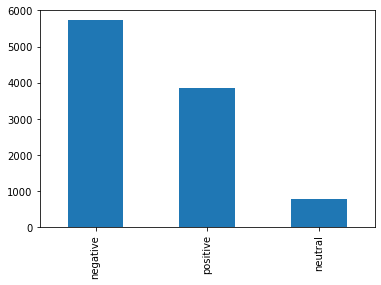

In [85]:
df['sentiment_label'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='year', ylabel='sentiment'>

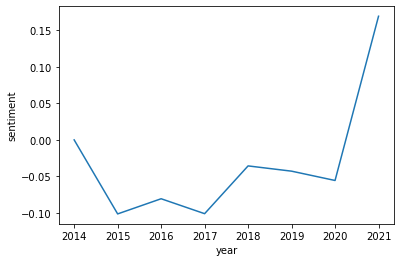

In [91]:
df['year'] = df['date'].dt.year.drop(2021)
sns.lineplot(data = df, x = 'year', y = 'sentiment', ci = None)

<AxesSubplot:xlabel='year', ylabel='sentiment'>

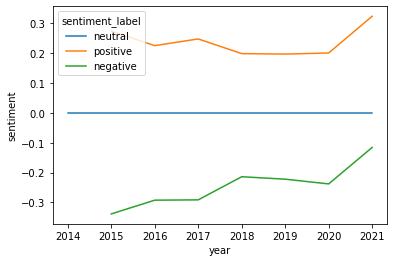

In [95]:
sns.lineplot(data = df, x = 'year', y = 'sentiment', ci = None, hue = 'sentiment_label')

In [ ]:
# Easy to say that Trump's time on twitter has mostly been negative. Of course, this is the insults after all.

In [102]:
mean_tweets = df[(df['sentiment'] <=-0.07) & (df['sentiment_label'] == 'negative')]

In [103]:
mean_tweets

,date,target,insult,tweet,year,sentiment,sentiment_label
6,2015-06-25,willie-geist,uncomfortable looking,Uncomfortable looking NBC reporter Willie Geis...,2015.0,-0.170000,negative
14,2015-06-25,lawrence-o-donnell,dopey political pundit,"I hear that dopey political pundit, Lawrence O...",2015.0,-0.350000,negative
15,2015-06-25,lawrence-o-donnell,one of the dumber people on television,"I hear that dopey political pundit, Lawrence O...",2015.0,-0.350000,negative
16,2015-06-25,rick-scott,did really poorly on television,Governor Rick Scott of Florida did really poor...,2015.0,-0.400000,negative
17,2015-06-26,john-roberts,let us down,Once again the Bush appointed Supreme Court Ju...,2015.0,-0.305642,negative
...,...,...,...,...,...,...,...
10344,2021-01-03,cdc,ridiculous,The number of cases and deaths of the China Vi...,2021.0,-0.097917,negative
10347,2021-01-04,republicans,'Surrender Caucus',The “Surrender Caucus” within the Republican P...,2021.0,-0.072685,negative
10348,2021-01-04,republicans,"weak and ineffective , willing to accept the ...",The “Surrender Caucus” within the Republican P...,2021.0,-0.072685,negative
10354,2021-01-06,mike-pence,didn’t have the courage to do what should have...,Mike Pence didn’t have the courage to do what ...,2021.0,-0.208333,negative


In [104]:
mean_tweets['insult'].value_counts()

Fake News                                      239
Crooked                                         99
failing                                         37
Sleepy Joe                                      34
FAKE NEWS                                       33
                                              ... 
phony stories                                    1
All talk, talk, talk - no action or results      1
Without me her ratings would tank                1
ridiculous quantitative tightening               1
has disgraced the media world                    1
Name: insult, Length: 3239, dtype: int64

In [105]:
mean_tweets['insult'].value_counts().nlargest(20)

Fake News               239
Crooked                  99
failing                  37
Sleepy Joe               34
FAKE NEWS                33
Fake News Media          32
Witch Hunt               28
Crooked Hillary          24
Fake                     24
Corrupt                  23
dishonest                23
Failing                  21
Crazy Nancy              19
Mini Mike                18
corrupt                  18
Sad!                     17
Do Nothing Democrats     16
Impeachment Hoax         16
Lamestream Media         14
Fake News!               14
Name: insult, dtype: int64

<AxesSubplot:>

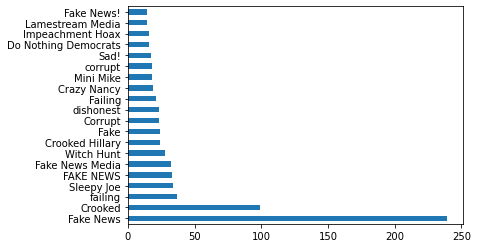

In [106]:
mean_tweets['insult'].value_counts().nlargest(20).plot(kind = 'barh')

In [108]:
df.head()

,date,target,insult,tweet,year,sentiment,sentiment_label
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014.0,0.0000,neutral
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014.0,0.0000,neutral
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015.0,0.2375,positive
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015.0,0.0000,neutral
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015.0,0.0000,neutral


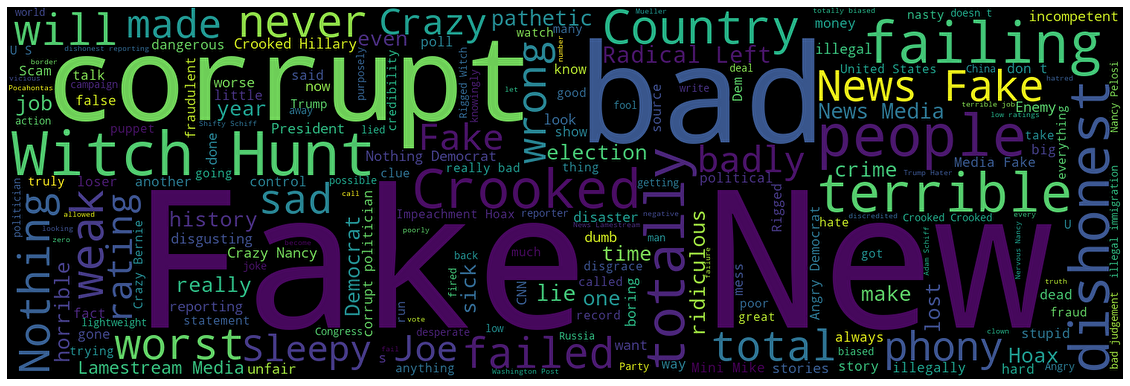

In [110]:
meantxt = " ".join(mean_tweets.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(meantxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

In [ ]:
# Insults above with a sentiment rating of -0.07